Linear Regression: R² = 0.2680, RMSE = 10.9237
Ridge Regression: R² = 0.2680, RMSE = 10.9235
Lasso Regression: R² = 0.2684, RMSE = 10.9200
Random Forest: R² = 0.4271, RMSE = 9.6636
XGBoost: R² = 0.3769, RMSE = 10.0782


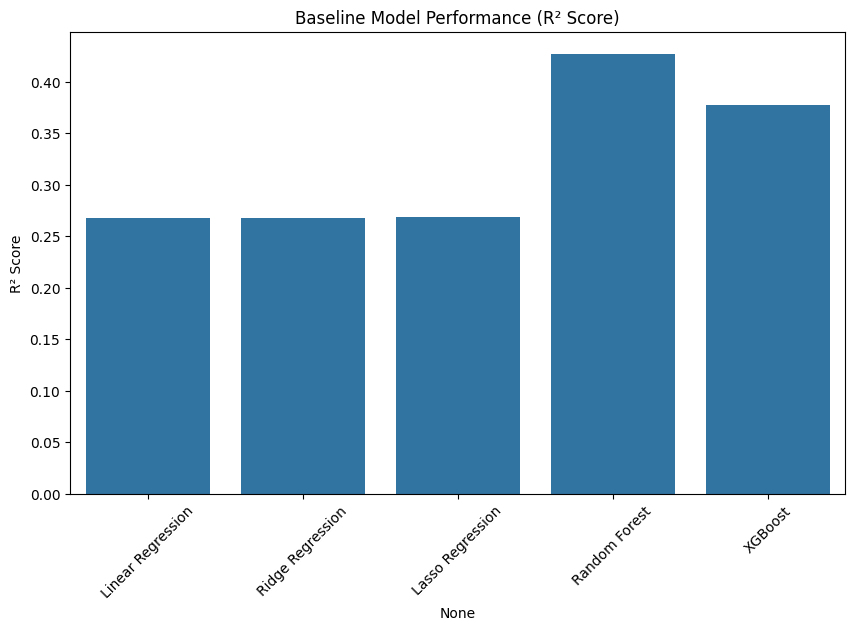

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

df = pd.read_csv('CW1_train_processed.csv')

# Split data
X = df.drop(columns=['outcome'])
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R² Score": r2, "RMSE": rmse}
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T

# Display results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.title("Baseline Model Performance (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


# Grid Search for Random Forest and XGBoost

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Run Grid Search for Random Forest
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

# Run Grid Search for XGBoost
xgb = XGBRegressor(random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb = xgb_grid_search.best_estimator_

# Print best parameters
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)
print("\nBest XGBoost Parameters:", xgb_grid_search.best_params_)

# Evaluate optimized models
rf_y_pred = best_rf.predict(X_test)
xgb_y_pred = best_xgb.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))

# Print optimized results
print(f"\nOptimized Random Forest: R² = {rf_r2:.4f}, RMSE = {rf_rmse:.4f}")
print(f"Optimized XGBoost: R² = {xgb_r2:.4f}, RMSE = {xgb_rmse:.4f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features